# **1. Data Preperation and Cleaning**

In [18]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("cityofLA/los-angeles-metro-bike-share-trip-data")

print("Path to dataset files:", path)

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Load the main trip data CSV (assuming it's named something like 'Metro_Bike_Share_Trips.csv')
for file in files:
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        df = pd.read_csv(dataset_path)
        break

Path to dataset files: /root/.cache/kagglehub/datasets/cityofLA/los-angeles-metro-bike-share-trip-data/versions/3
Files in dataset: ['metro-bike-share-trip-data.csv', 'socrata_metadata.json']


In [19]:
df = df.dropna(thresh=int(0.1 * len(df)), axis=1)

In [20]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])
df['Trip Duration (min)'] = df['Duration'] / 60  # Optional helper column

In [21]:
df = df[(df['Duration'] > 60) & (df['Duration'] < 10000)]

In [22]:
df = df.dropna(subset=['Starting Station ID', 'Ending Station ID'])

In [23]:
df['Passholder Type'] = df['Passholder Type'].astype('category')
df['Trip Route Category'] = df['Trip Route Category'].astype('category')

In [24]:
df.head(5)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts,Trip Duration (min)
9,18481915,600,2017-01-23 18:48:00,2017-01-23 18:58:00,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
11,19403230,480,2017-02-05 09:43:00,2017-02-05 09:51:00,3064.0,34.046810,-118.256981,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
13,18732968,480,2017-01-27 19:55:00,2017-01-27 20:03:00,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
15,20298819,780,2017-02-18 12:39:00,2017-02-18 12:52:00,3014.0,34.056610,-118.237213,3000.0,NaN,NaN,...,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
17,21369192,1380,2017-03-05 18:35:00,2017-03-05 18:58:00,3078.0,34.064281,-118.238937,3000.0,NaN,NaN,...,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


# **2. Data Visualization**

<ipython-input-25-bc5fa99af751>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=shades)


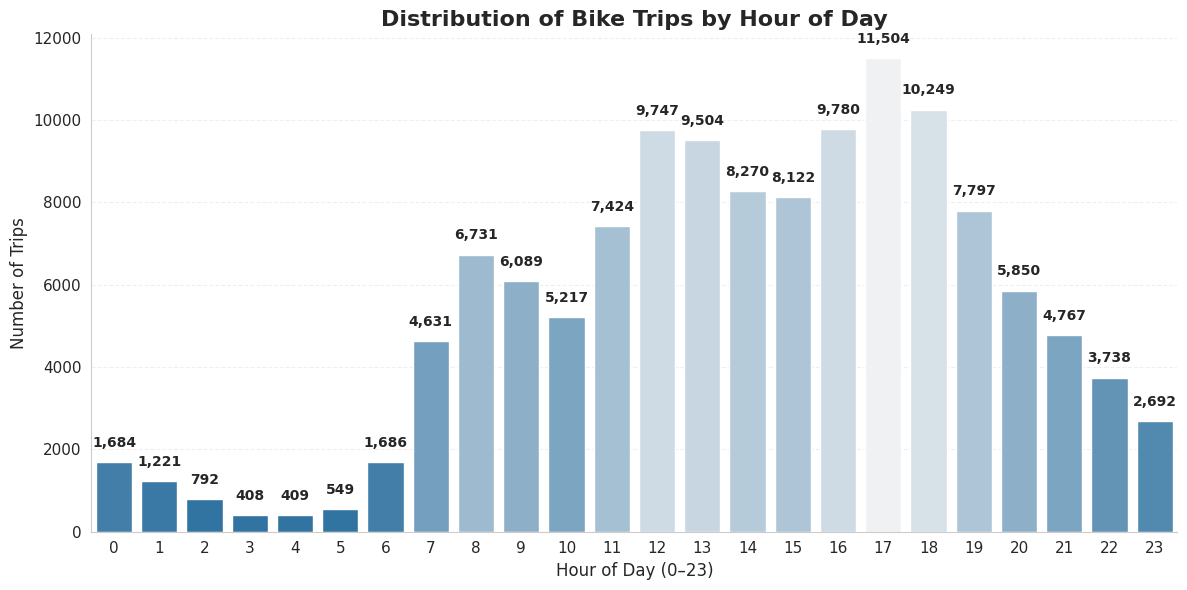

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime and extract hour
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['Start Hour'] = df['Start Time'].dt.hour

# Count trips per hour
hour_counts = df['Start Hour'].value_counts().sort_index()

# Normalize trip counts to 0–1 range for color mapping
norm = (hour_counts - hour_counts.min()) / (hour_counts.max() - hour_counts.min())

# Generate varying shades of blue based on normalized counts
colors = sns.light_palette("#1f77b4", n_colors=24)[::-1]  # Reverse if you want darker = higher
shades = [colors[int(val * (len(colors) - 1))] for val in norm]

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=hour_counts.index, y=hour_counts.values, palette=shades)

# Annotate bars
for i, value in enumerate(hour_counts.values):
    bars.text(i, value + 300, f"{value:,}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Distribution of Bike Trips by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (0–23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


<ipython-input-26-193802ccd59d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
<ipython-input-26-193802ccd59d>:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(
<ipython-input-26-193802ccd59d>:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


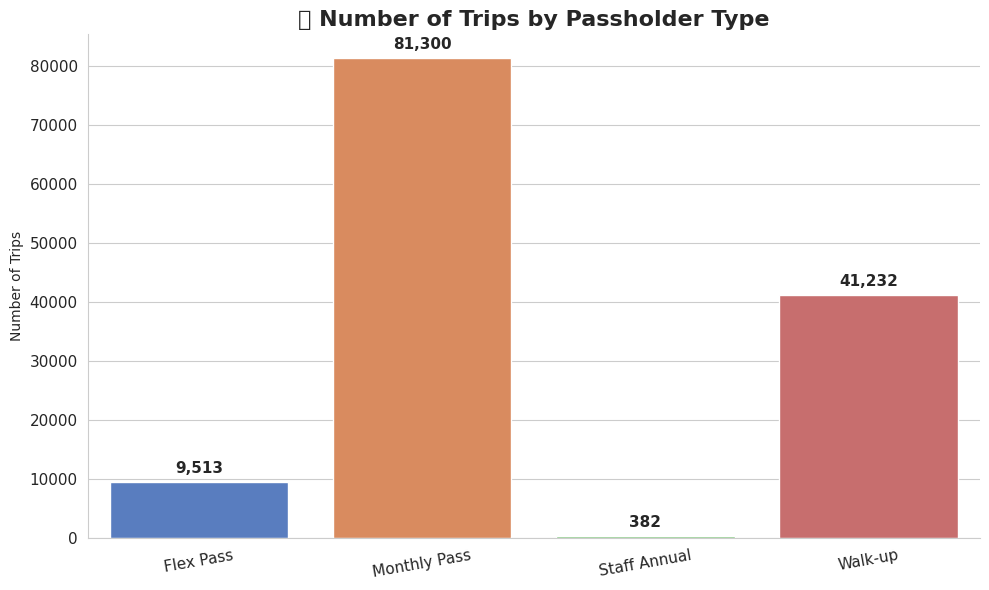

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean style
sns.set_style("whitegrid")

# Sort by trip count
passholder_counts = passholder_counts.sort_values(by='Trip Count', ascending=False).reset_index(drop=True)

# Plot setup
plt.figure(figsize=(10, 6))
colors = sns.color_palette('muted')

# Barplot with categories on x-axis
barplot = sns.barplot(
    data=passholder_counts,
    x='Passholder Type',
    y='Trip Count',
    palette=colors
)

# Add value labels on top of bars using category positions, not index
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{int(height):,}',
        (p.get_x() + p.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Labels and title
plt.title('📊 Number of Trips by Passholder Type', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Trips')
plt.xticks(rotation=10, fontsize=11)
plt.yticks(fontsize=11)

# Final clean-up
sns.despine()
plt.tight_layout()
plt.show()

# **3. Data Modeling**

## **3.1 DATA MODEL 1**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score
)
import joblib

In [28]:
# Filter dataset and drop rows with missing values
df_model = df[['Trip Duration (min)', 'Start Hour', 'Trip Route Category', 'Passholder Type']].dropna()

# Binary classification: only Monthly Pass and Walk-up
df_model = df_model[df_model['Passholder Type'].isin(['Walk-up', 'Monthly Pass'])]

# Define features and target
X = df_model[['Trip Duration (min)', 'Start Hour', 'Trip Route Category']]
y = df_model['Passholder Type']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
# Preprocessing: one-hot encode Trip Route Category
categorical = ['Trip Route Category']
numeric = ['Trip Duration (min)', 'Start Hour']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# Logistic Regression model with class balancing
log_reg_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [30]:
# Train the pipeline
log_reg_pipe.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg_pipe.predict(X_test)
y_proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

# Binary version of y_test for ROC AUC
y_binary = (y_test == "Walk-up").astype(int)

In [31]:
def evaluate_model(y_true, y_pred, y_proba=None, label="Model"):
    print(f"\n {label} Results")
    print("Accuracy:       ", accuracy_score(y_true, y_pred))
    print("Precision:      ", precision_score(y_true, y_pred, pos_label='Walk-up'))
    print("Recall:         ", recall_score(y_true, y_pred, pos_label='Walk-up'))
    print("F1 Score:       ", f1_score(y_true, y_pred, pos_label='Walk-up'))
    if y_proba is not None:
        print("ROC AUC Score:  ", roc_auc_score((y_true == "Walk-up").astype(int), y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluation
evaluate_model(y_test, y_pred_lr, y_proba_lr, label="Logistic Regression")


 Logistic Regression Results
Accuracy:        0.7543396226415094
Precision:       0.6414376321353066
Recall:          0.5785659801678108
F1 Score:        0.6083817926609184
ROC AUC Score:   0.7962458390248882

Classification Report:
               precision    recall  f1-score   support

Monthly Pass       0.80      0.84      0.82     15984
     Walk-up       0.64      0.58      0.61      7866

    accuracy                           0.75     23850
   macro avg       0.72      0.71      0.71     23850
weighted avg       0.75      0.75      0.75     23850



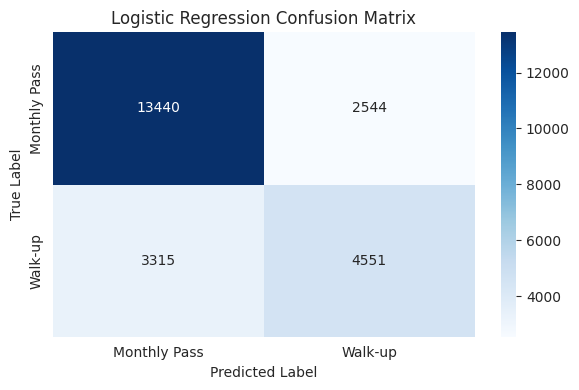

In [32]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg_pipe.classes_,
            yticklabels=log_reg_pipe.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [33]:
# Save the pipeline for future use
joblib.dump(log_reg_pipe, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


## **3.2 DATA MODEL 2**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix,
    roc_auc_score
)
import joblib

In [35]:
# Keep only needed columns and drop missing
df_model = df[['Trip Duration (min)', 'Start Hour', 'Trip Route Category', 'Passholder Type']].dropna()
df_model = df_model[df_model['Passholder Type'].isin(['Walk-up', 'Monthly Pass'])]

# Define features and target
X = df_model[['Trip Duration (min)', 'Start Hour', 'Trip Route Category']]
y = df_model['Passholder Type']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
# Preprocessing
categorical = ['Trip Route Category']
numeric = ['Trip Duration (min)', 'Start Hour']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

# Decision Tree Classifier pipeline (with limited depth to avoid overfitting)
tree_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42))
])

In [37]:
# Fit model
tree_pipe.fit(X_train, y_train)

# Predict
y_pred_tree = tree_pipe.predict(X_test)
y_proba_tree = tree_pipe.predict_proba(X_test)[:, 1]  # Prob for ROC AUC
y_binary_tree = (y_test == "Walk-up").astype(int)

In [38]:
def evaluate_model(y_true, y_pred, y_proba=None, label="Model"):
    print(f"\n {label} Results")
    print("Accuracy:       ", accuracy_score(y_true, y_pred))
    print("Precision:      ", precision_score(y_true, y_pred, pos_label='Walk-up'))
    print("Recall:         ", recall_score(y_true, y_pred, pos_label='Walk-up'))
    print("F1 Score:       ", f1_score(y_true, y_pred, pos_label='Walk-up'))
    if y_proba is not None:
        print("ROC AUC Score:  ", roc_auc_score((y_true == "Walk-up").astype(int), y_proba))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Run evaluation
evaluate_model(y_test, y_pred_tree, y_proba_tree, label="Decision Tree")


 Decision Tree Results
Accuracy:        0.7355974842767296
Precision:       0.5810979413599501
Recall:          0.7105263157894737
F1 Score:        0.6393273850377488
ROC AUC Score:   0.8064228296755948

Classification Report:
               precision    recall  f1-score   support

Monthly Pass       0.84      0.75      0.79     15984
     Walk-up       0.58      0.71      0.64      7866

    accuracy                           0.74     23850
   macro avg       0.71      0.73      0.72     23850
weighted avg       0.75      0.74      0.74     23850



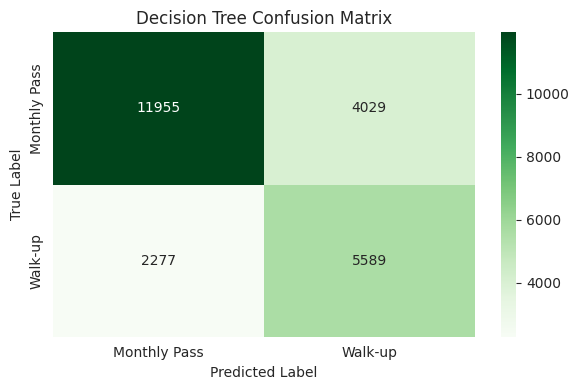

In [39]:
# Confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=tree_pipe.classes_,
            yticklabels=tree_pipe.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

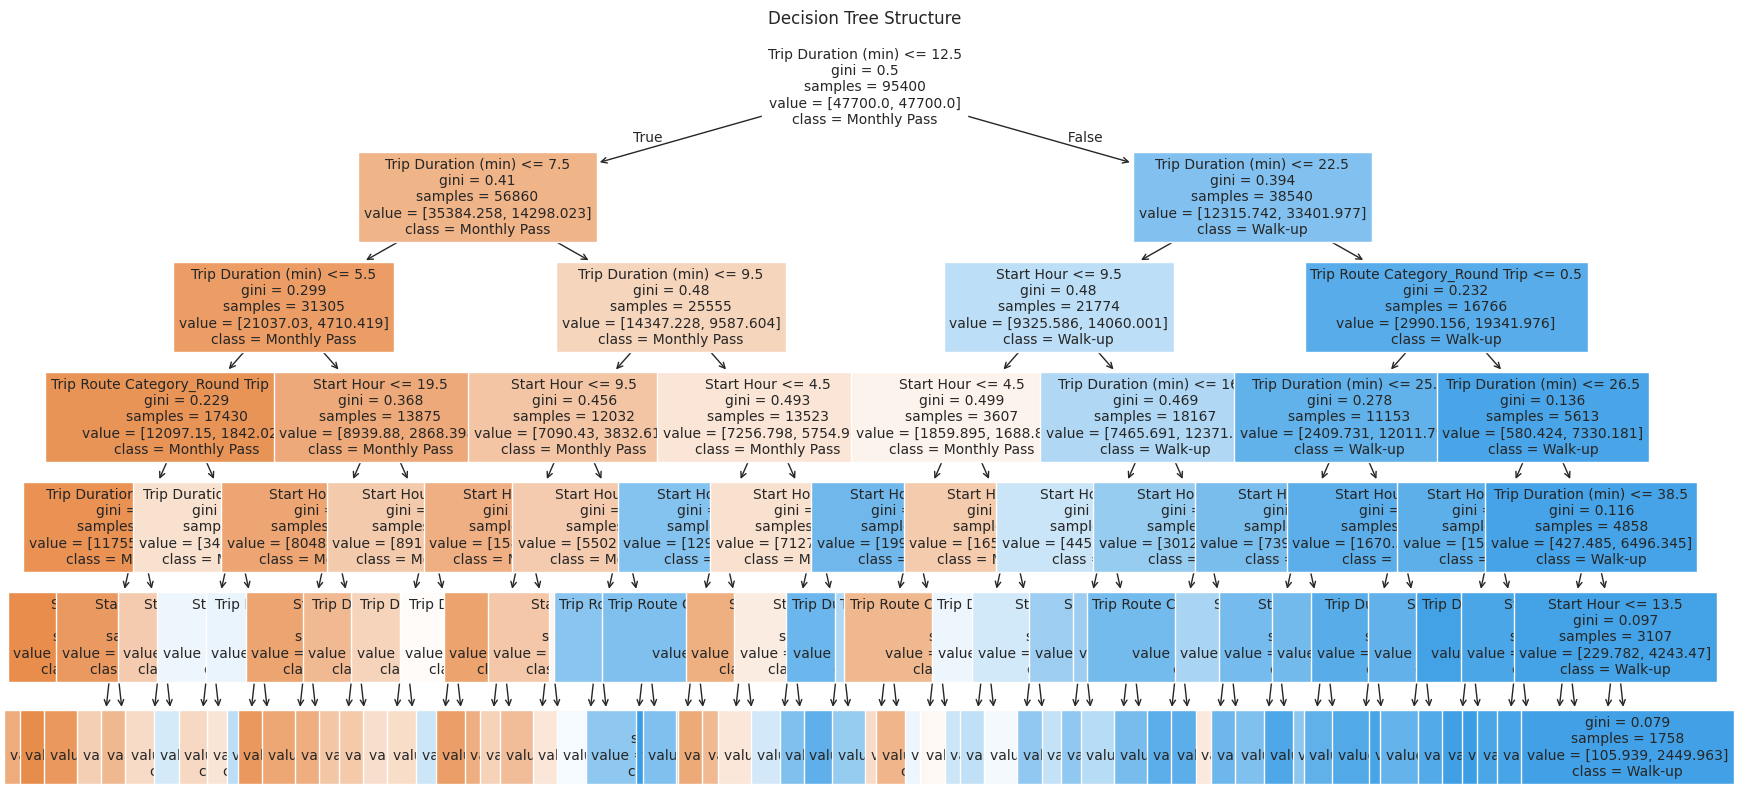

In [40]:
# Extract trained tree and feature names
tree_model = tree_pipe.named_steps['model']
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(['Trip Route Category']).tolist() + numeric

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=feature_names, class_names=tree_pipe.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [41]:
# Save the model pipeline
joblib.dump(tree_pipe, 'decision_tree_model.pkl')
print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'


## **3.3 Figure 5: Model Comparison Chart**

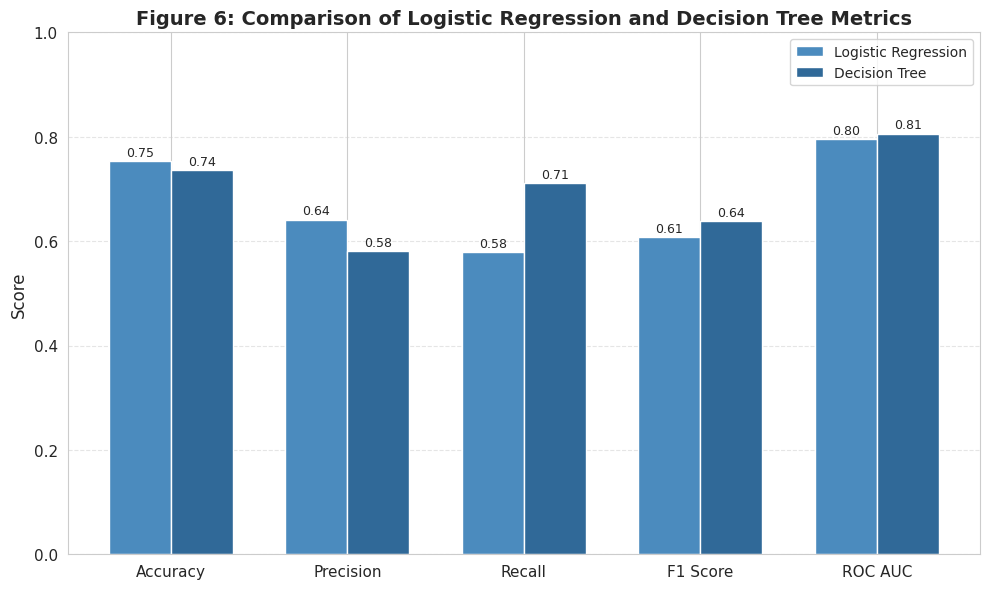

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Define model performance values from your results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

logistic_scores = [0.754, 0.641, 0.579, 0.608, 0.796]
tree_scores     = [0.736, 0.581, 0.711, 0.639, 0.806]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': logistic_scores,
    'Decision Tree': tree_scores
})

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(metrics))

plt.bar([i - bar_width/2 for i in x], df_plot['Logistic Regression'], width=bar_width, label='Logistic Regression', color='#4B8BBE')
plt.bar([i + bar_width/2 for i in x], df_plot['Decision Tree'], width=bar_width, label='Decision Tree', color='#306998')

# Add value labels
for i in x:
    plt.text(i - bar_width/2, df_plot['Logistic Regression'][i] + 0.01, f"{df_plot['Logistic Regression'][i]:.2f}", ha='center', fontsize=9)
    plt.text(i + bar_width/2, df_plot['Decision Tree'][i] + 0.01, f"{df_plot['Decision Tree'][i]:.2f}", ha='center', fontsize=9)

# Styling
plt.xticks(x, metrics, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Score', fontsize=12)
plt.title('Figure 6: Comparison of Logistic Regression and Decision Tree Metrics', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show or save
plt.savefig('figure6_model_comparison.png', dpi=300)
plt.show()
